UBER Analysis Project

In [1]:
# Importing neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\sara7\Downloads\My_Files\Python_Jupyter Project\Uber_Python EDA\UberDataset.csv")

Data Cleaning

In [19]:
df.head(2)

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [18]:
df.tail(2)

,start_date,end_date,category,start,stop,miles,purpose
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  653 non-null    object 
 1   end_date    653 non-null    object 
 2   category    653 non-null    object 
 3   start       653 non-null    object 
 4   stop        653 non-null    object 
 5   miles       653 non-null    float64
 6   purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [6]:
df.shape[0]

1156

In [16]:
# Checking Null values in Percentage for better clearification
(df.isnull().sum()/df.shape[0])*100

start_date    0.0
end_date      0.0
category      0.0
start         0.0
stop          0.0
miles         0.0
purpose       0.0
dtype: float64

In [8]:
# remove Null values
df.dropna(inplace=True)

In [9]:
# Basic Statistical Summary
df.describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [10]:
# Renaming columns for better clarity
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.head())


         start_date          end_date  category            start  \
0  01-01-2016 21:11  01-01-2016 21:17  Business      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business      Fort Pierce   
5  01-06-2016 17:15  01-06-2016 17:19  Business  West Palm Beach   

              stop  miles          purpose  
0      Fort Pierce    5.1   Meal/Entertain  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  
5  West Palm Beach    4.3   Meal/Entertain  


What’s the total number of trips?

In [11]:
total_trips = df.shape[0]
print("Total Trips:", total_trips)

Total Trips: 653


What’s the average distance (miles) per trip?

In [12]:
avg_miles = df['miles'].mean()
print("Average Miles per Trip:", round(avg_miles, 2))

Average Miles per Trip: 11.2


What’s the total distance traveled for Business vs Personal rides?

category
Business    7097.7
Personal     213.5
Name: miles, dtype: float64


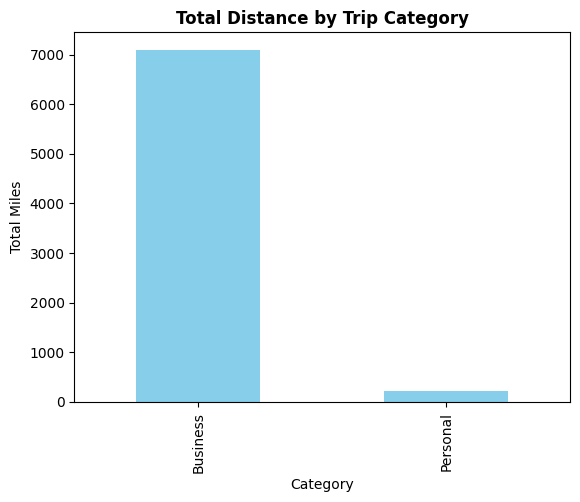

In [13]:
distance_by_category = df.groupby('category')['miles'].sum()
print(distance_by_category)

# Visualization of Trips by Category
distance_by_category.plot(kind='bar', color='skyblue')
figsize = (6, 6)
plt.title('Total Distance by Trip Category', fontweight='bold')
plt.xlabel('Category')  
plt.ylabel('Total Miles')
plt.show()

Which purpose has the highest number of trips?

purpose
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Name: count, dtype: int64


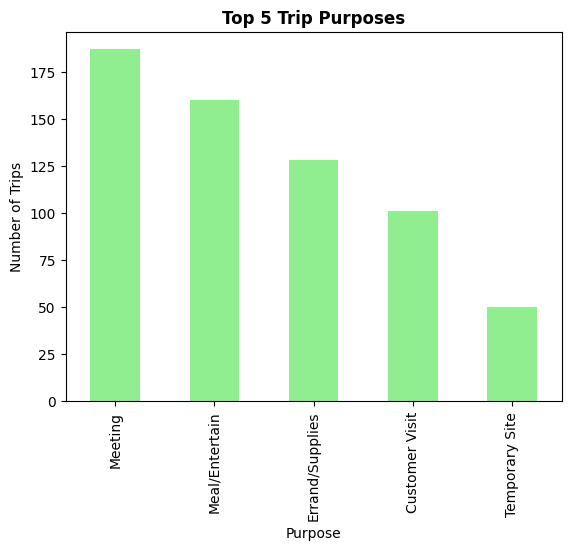

In [14]:
top_purpose = df['purpose'].value_counts().head(5)
print(top_purpose)

top_purpose.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Trip Purposes', fontweight='bold')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.show()

What are the most common start and stop locations?

In [15]:
top_starts = df['start'].value_counts().head(5)
top_stops = df['stop'].value_counts().head(5)

print("Top Start Locations:\n", top_starts)
print("\nTop Stop Locations:\n", top_stops)

Top Start Locations:
 start
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Name: count, dtype: int64

Top Stop Locations:
 stop
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Name: count, dtype: int64
